# **1 Objectif**


**A partir d'un ensemble de données contenant environ dix ans d'observations météorologiques quotidiennes provenant de nombreux endroits en Australie l'objectif est de prédire la variable cible : 'RainTomorrow'. Elle signifie : a-t-il plu le jour suivant, oui ou non ? Cette colonne est 'Oui' si la pluie pour ce jour était de 1 mm ou plus.**

**Ce premier fichier a pour objet une analyse exploratoires des données.**


# **2 Importation des bibliothèques**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

import datetime as dt



# **3 Datasets**


In [3]:
# Chargement du jeu de données

path_file_1 = "data/weatherAus.csv"
df = pd.read_csv(path_file_1)

# Chargement du fichier de coordonnées des stations météo

path_file_2 = "data/address_lat_long.csv" 
coordinates_df = pd.read_csv(path_file_2, index_col=0)

coordinates_df = coordinates_df.reset_index()
coordinates_df = coordinates_df.rename({'index' : 'Location'}, axis=1)



In [4]:
df.head()


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [5]:
coordinates_df.head()


Location          0           1
0         Albury -36.073302  146.916065
1  BadgerysCreek -33.879378  150.745175
2          Cobar -31.473725  145.794270
3   CoffsHarbour -30.282291  153.120049
4          Moree -29.462060  149.848557

## **Dimension**

In [6]:
print('La dimension du dataset df est :', df.shape)


La dimension du dataset df est : (145460, 23)


## **Types de variables**

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

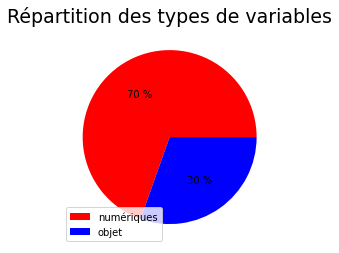

In [8]:
plt.pie(df.dtypes.value_counts(), colors = ['red', 'blue'], autopct='%0.f %%')
plt.ylabel('')
plt.legend(['numériques', 'objet'], loc = 'lower left' )
plt.title('Répartition des types de variables', size=19);


In [9]:
print('Nombre de variables par type :\n\n',df.dtypes.value_counts(),'\n')
print('Variables de type objet :', [var for var in df.columns if df[var].dtype == 'object'], '\n')
print('Variables de type numérique :', [var for var in df.columns if df[var].dtype == 'float64'], '\n')


Nombre de variables par type :

 float64    16
object      7
dtype: int64 

Variables de type objet : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'] 

Variables de type numérique : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'] 



**Il y a 7 variables de type objet** :

'['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

**Il y a 16 variables numériques** :

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

## **Statistiques**

In [10]:
df.describe()


MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

## **Valeurs manquantes**

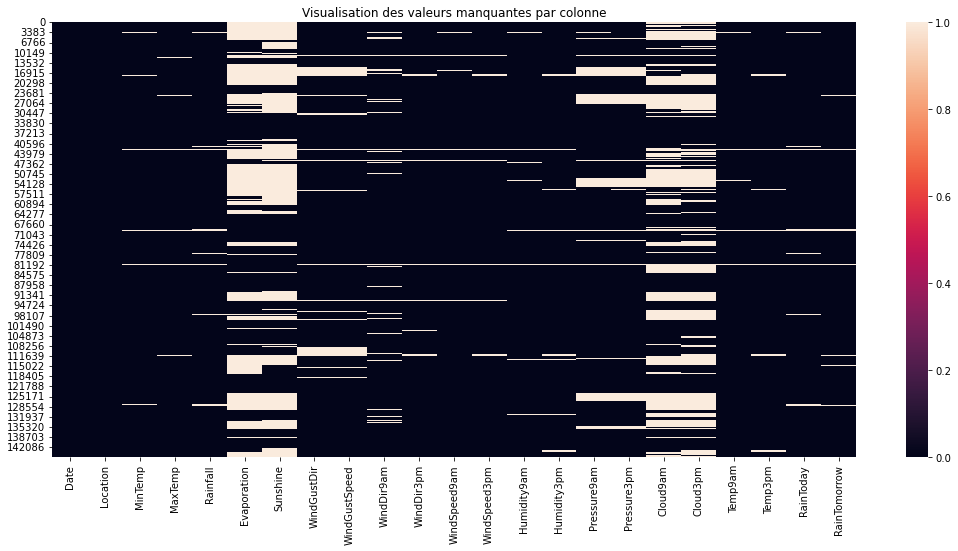

In [11]:
plt.figure(figsize=(18,8))

sns.heatmap(df.isna())
plt.title('Visualisation des valeurs manquantes par colonne');


**Cette heatmap montre clairement que les variables 'Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am'  présentent de nombreuses valeurs manquantes.**

In [12]:
# Dataframe des valeurs manquantes :

df_nan= pd.DataFrame(df.isna().sum(), columns=['nombre_Nan'])
df_nan['pourcentage_Nan'] = np.round(df_nan['nombre_Nan']*100/df.shape[0],1)
df_nan

nombre_Nan  pourcentage_Nan
Date                    0              0.0
Location                0              0.0
MinTemp              1485              1.0
MaxTemp              1261              0.9
Rainfall             3261              2.2
Evaporation         62790             43.2
Sunshine            69835             48.0
WindGustDir         10326              7.1
WindGustSpeed       10263              7.1
WindDir9am          10566              7.3
WindDir3pm           4228              2.9
WindSpeed9am         1767              1.2
WindSpeed3pm         3062              2.1
Humidity9am          2654              1.8
Humidity3pm          4507              3.1
Pressure9am         15065             10.4
Pressure3pm         15028             10.3
Cloud9am            55888             38.4
Cloud3pm            59358             40.8
Temp9am              1767              1.2
Temp3pm              3609              2.5
RainToday            3261              2.2
RainTomorrow         3267              2.2

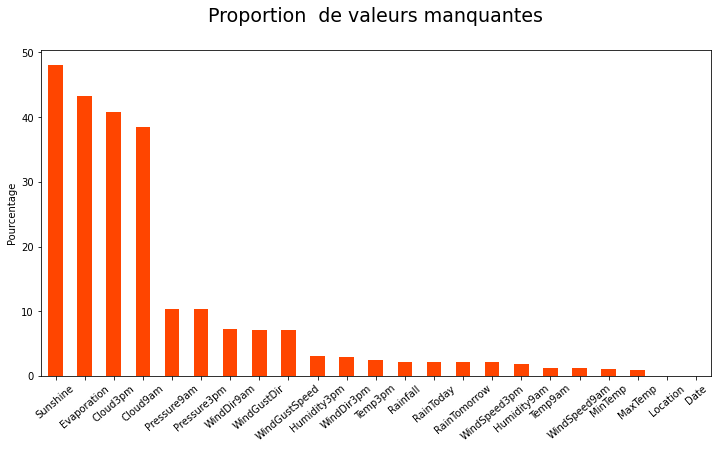

In [13]:
plt.figure(figsize=(12,6))

df_nan['pourcentage_Nan'].sort_values(ascending=False).plot.bar(ylabel='Pourcentage',\
                                                                        rot=40,\
                                                                        color='orangered')
plt.title('Proportion  de valeurs manquantes\n', size=19);


# **4 Cartes d'Australie animées**

## **Préparation des données** 

**Afin d'avoir une vue d'ensemble du climat en Australie, il est intéressant de visualiser sur une carte d'Australie la température moyenne mensuelle par ville ainsi que les hauteurs de précipitations moyennes par ville.**

### **DataFrame temperature_data**

In [14]:
# Création d'une fonction retournant les coordonnées des villes

def find_geographic_code(city): 
    coordinates = coordinates_df[coordinates_df['Location'] == city].iloc[0] 
    return list((coordinates[1], coordinates[2]))
    

In [15]:
find_geographic_code('Sydney')

[-33.84469472429514, 151.07468577388005]

In [16]:
# Création d'un dictionnaire locations_lat_long : {ville : [latitude, logitude]}

all_locations = df['Location'].unique()
locations_lat_long = {k : find_geographic_code(k) for k in all_locations }
locations_lat_long


{'Albury': [-36.07330197882847, 146.91606502590943],
 'BadgerysCreek': [-33.87937752852425, 150.74517478576468],
 'Cobar': [-31.473725420065968, 145.79426957181818],
 'CoffsHarbour': [-30.282291051013377, 153.1200486248014],
 'Moree': [-29.462060452535876, 149.8485568356889],
 'Newcastle': [-32.92242211608378, 151.78239037786722],
 'NorahHead': [-33.28848537849165, 151.56636661356293],
 'NorfolkIsland': [-29.03877445569624, 167.95384919060484],
 'Penrith': [-33.744699615872406, 150.69433893513147],
 'Richmond': [-37.81663821167994, 145.0011414843747],
 'Sydney': [-33.84469472429514, 151.07468577388005],
 'SydneyAirport': [-33.949900882976614, 151.18198750012593],
 'WaggaWagga': [-35.11126713043006, 147.35836367744025],
 'Williamtown': [-32.80513925850641, 151.84577429893213],
 'Wollongong': [-34.42818060593263, 150.89443168358287],
 'Canberra': [-35.28168969572334, 149.12881308531453],
 'Tuggeranong': [-35.44647055709607, 149.10030206298518],
 'MountGinini': [-35.52833496977849, 148.77

In [17]:
# Ajout de deux colonnes latitude et longitude à df (temporaire)

df_tp = df.copy()

df_tp[['latitude','longitude']] = df_tp['Location'].apply(lambda x: pd.Series(locations_lat_long[x]))
df_tp[['latitude','longitude']].head()


latitude   longitude
0 -36.073302  146.916065
1 -36.073302  146.916065
2 -36.073302  146.916065
3 -36.073302  146.916065
4 -36.073302  146.916065

In [18]:
# Ajout d'une colonne température moyenne min max du jour à df
# Ajout d'une colonne Année-Mois

df_tp['AvgTemp'] = (df_tp['MinTemp'] + df_tp['MaxTemp'])/2
df_tp['Date'] = pd.to_datetime(df_tp['Date'])

df_tp['mont_of_year'] = df_tp['Date'].apply(lambda x: dt.datetime.strftime(x,'%b-%Y'))
df_tp['mont_of_year_formatted'] = pd.to_datetime(df_tp['mont_of_year'])
df_tp.head()


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1 2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2 2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3 2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4 2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Cloud3pm  Temp9am  Temp3pm  \
0           W           44.0          W  ...      NaN     16.9     21.8   
1         WNW           44.0        NNW  ...      NaN     17.2     24.3   
2         WSW           46.0          W  ...      2.0     21.0     23.2   
3          NE           24.0         SE  ...      NaN     18.1     26.5   
4           W           41.0        ENE  ...      8.0     17.8     29.7   

   RainToday  RainTomorrow   latitude   longitude  AvgTemp  mont_of_year  \
0         No            No -36.073302  146.916065    18.15      Dec-2008   
1         No            No -36.073302  146.916065    16.25      Dec-2008   
2         No            No -36.073302  146.916065    19.30      Dec-2008   
3         No            No -36.073302  146.916065    18.60      Dec-2008   
4         No            No -36.073302  146.916065    24.90      Dec-2008   

   mont_of_year_formatted  
0              2008-12-01  
1              2008-12-01  
2              2008-12-01  
3              2008-12-01  
4              2008-12-01  

[5 rows x 28 columns]

In [19]:
# Création d'un dataframe température_data comprenant la ville, sa latitude, sa longitude, l'année-mois et la température moyenne

temperature_data = df_tp.groupby(["Location","longitude",'latitude','mont_of_year','mont_of_year_formatted'])['AvgTemp'].mean().reset_index()
temperature_data.head()


Location   longitude   latitude mont_of_year mont_of_year_formatted  \
0  Adelaide  138.600146 -34.909275     Apr-2009             2009-04-01   
1  Adelaide  138.600146 -34.909275     Apr-2010             2010-04-01   
2  Adelaide  138.600146 -34.909275     Apr-2012             2012-04-01   
3  Adelaide  138.600146 -34.909275     Apr-2013             2013-04-01   
4  Adelaide  138.600146 -34.909275     Apr-2014             2014-04-01   

     AvgTemp  
0  17.908333  
1  19.165000  
2  18.388333  
3  18.551667  
4  18.163333

In [20]:
temperature_data.sort_values(by=['mont_of_year_formatted'], inplace=True)
temperature_data.head()


Location   longitude   latitude mont_of_year mont_of_year_formatted  \
994   Canberra  149.128813 -35.281690     Nov-2007             2007-11-01   
927   Canberra  149.128813 -35.281690     Dec-2007             2007-12-01   
945   Canberra  149.128813 -35.281690     Jan-2008             2008-01-01   
3657    Sydney  151.074686 -33.844695     Feb-2008             2008-02-01   
936   Canberra  149.128813 -35.281690     Feb-2008             2008-02-01   

        AvgTemp  
994   18.403333  
927   19.216129  
945   22.237097  
3657  21.627586  
936   18.636207

In [21]:
# Suppression des lignes pour lesquelles la température est manquante

temperature_data = temperature_data[~temperature_data['AvgTemp'].isnull()]

temperature_data.describe()

longitude     latitude      AvgTemp
count  4769.000000  4769.000000  4769.000000
mean    141.962291   -32.837822    17.725182
std      12.055447     6.048677     5.724187
min     115.102639   -42.881144    -1.044231
25%     138.600146   -36.290545    13.253226
50%     145.732042   -34.022929    17.658065
75%     150.694339   -31.473725    22.110000
max     167.953849   -12.454697    32.437931

In [22]:
# Transformation des températures négatives (min=-1.044) en positives pour la cartogtaphie animée avec size="AvgTemp"

temperature_data['AvgTemp'] = temperature_data['AvgTemp'].apply(lambda x: 0 if x < 0 else x )
temperature_data.describe()


longitude     latitude      AvgTemp
count  4769.000000  4769.000000  4769.000000
mean    141.962291   -32.837822    17.725832
std      12.055447     6.048677     5.722126
min     115.102639   -42.881144     0.000000
25%     138.600146   -36.290545    13.253226
50%     145.732042   -34.022929    17.658065
75%     150.694339   -31.473725    22.110000
max     167.953849   -12.454697    32.437931

### **DataFrame Rainfall_data**

In [23]:
# Création d'un dataframe rainfall_data comprenant la ville, sa latitude, sa longitude, l'année-mois et la hauteur des précipitations

Rainfall_data = df_tp.groupby(["Location","longitude",'latitude','mont_of_year','mont_of_year_formatted'])['Rainfall'].mean().reset_index()
Rainfall_data.head()


Location   longitude   latitude mont_of_year mont_of_year_formatted  \
0  Adelaide  138.600146 -34.909275     Apr-2009             2009-04-01   
1  Adelaide  138.600146 -34.909275     Apr-2010             2010-04-01   
2  Adelaide  138.600146 -34.909275     Apr-2012             2012-04-01   
3  Adelaide  138.600146 -34.909275     Apr-2013             2013-04-01   
4  Adelaide  138.600146 -34.909275     Apr-2014             2014-04-01   

   Rainfall  
0  2.453333  
1  1.653333  
2  0.931034  
3  1.229630  
4  1.686667

In [24]:
Rainfall_data.sort_values(by=['mont_of_year_formatted'], inplace=True)
Rainfall_data.head()


Location   longitude   latitude mont_of_year mont_of_year_formatted  \
994   Canberra  149.128813 -35.281690     Nov-2007             2007-11-01   
927   Canberra  149.128813 -35.281690     Dec-2007             2007-12-01   
945   Canberra  149.128813 -35.281690     Jan-2008             2008-01-01   
3657    Sydney  151.074686 -33.844695     Feb-2008             2008-02-01   
936   Canberra  149.128813 -35.281690     Feb-2008             2008-02-01   

      Rainfall  
994   3.180000  
927   3.258065  
945   1.412903  
3657  8.910345  
936   2.227586

In [25]:
# Suppression des lignes pour lesquelles la hauteur des précipitations est manquante

Rainfall_data = Rainfall_data[~Rainfall_data['Rainfall'].isnull()]

Rainfall_data.describe()

longitude     latitude     Rainfall
count  4767.000000  4767.000000  4767.000000
mean    141.972867   -32.836928     2.378959
std      12.046908     6.049789     2.792134
min     115.102639   -42.881144     0.000000
25%     138.600146   -36.290545     0.713333
50%     145.732042   -34.022929     1.592857
75%     150.694339   -31.473725     3.106667
max     167.953849   -12.454697    39.650000

## **Cartographie animée de la variation des températures**

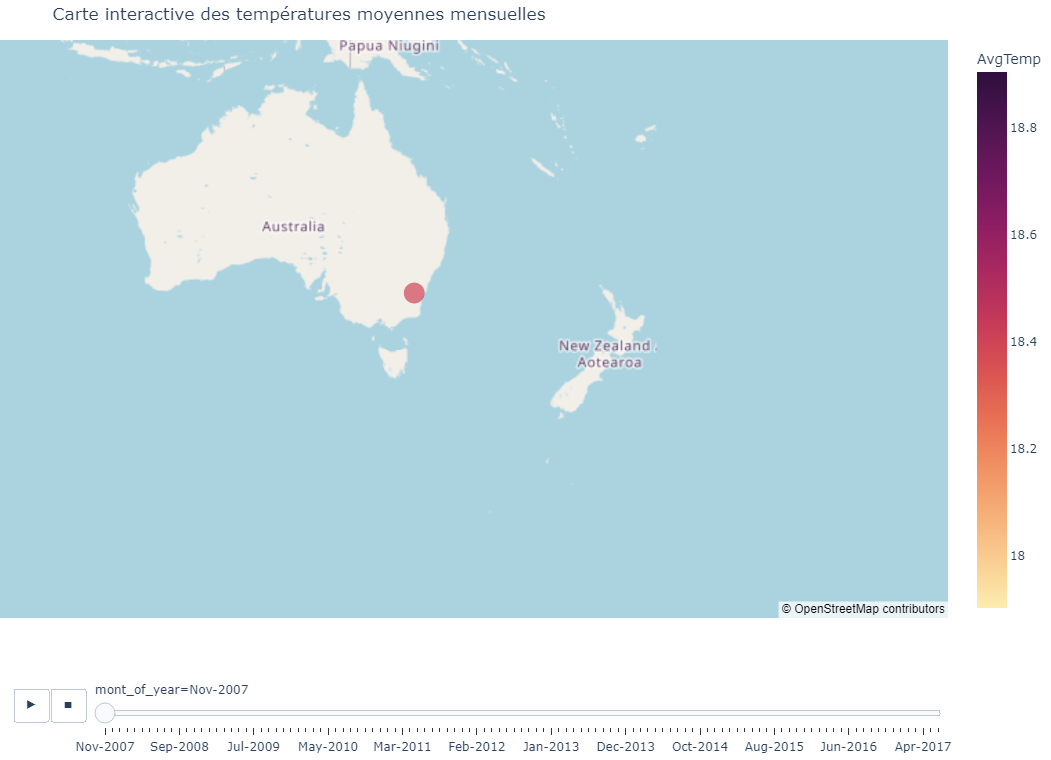

In [26]:
fig = px.scatter_mapbox(temperature_data, lat="latitude", lon="longitude", hover_name="Location", color="AvgTemp",
                        size="AvgTemp", color_continuous_scale=px.colors.sequential.matter, size_max=20,
                        zoom=3, height=760, mapbox_style="open-street-map",animation_frame="mont_of_year",
                        title="Carte interactive des températures moyennes mensuelles")
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()


**Commentaires :** 
 

*   La temperature dans le nord d'Australie est plus élevée que le sud.
*   Les températures les plus élevées sont en janvier et les plus froides en juillet.


## **Cartographie animée de la variation des hauteurs de précipitations**

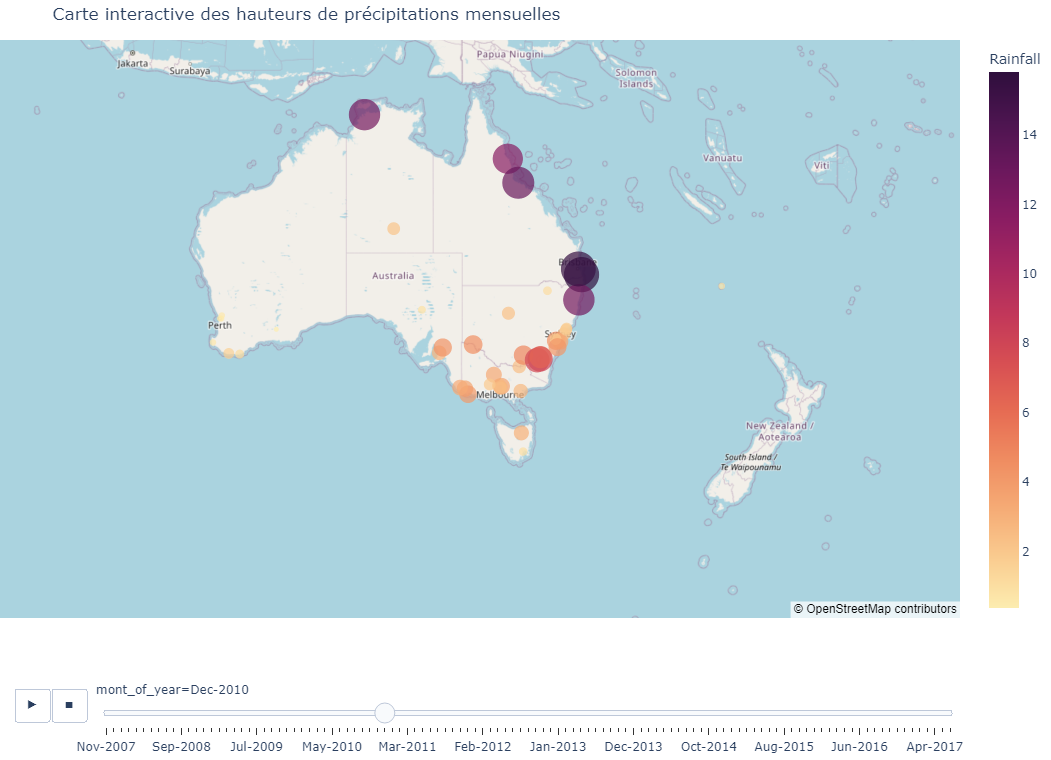

In [27]:
fig = px.scatter_mapbox(Rainfall_data, lat="latitude", lon="longitude", hover_name="Location", color="Rainfall",
                        size="Rainfall", color_continuous_scale=px.colors.sequential.matter, size_max=40,
                        zoom=3, height=760, mapbox_style="open-street-map",animation_frame="mont_of_year",
                        title="Carte interactive des hauteurs de précipitations mensuelles")
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()

**Un rapide survol de cette animation des hauteurs de précipitations montre que que :**
- Les précipitations les plus importantes apparaissent dans le long des côtes nord, nord/est en janvier/février chaque année dans les villes de Darwin, Cairns et Townsville.
- Le sud connait peu de précipitations de janvier à février.
- La région centre Ulura, AliceSprings est très sèche.




# **5 Analyse des variables et visualisations**

## **'RainFall' vs 'WindDirection'**

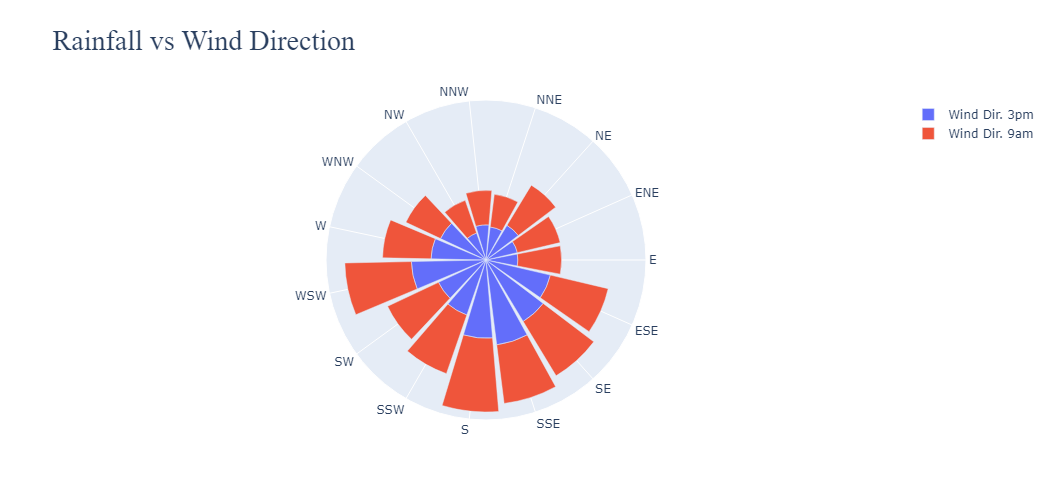

In [28]:
directions = ['E','ENE', 'NE', 'NNE', 'NNW', 'NW', 'WNW', 'W', 'WSW', 'SW', 'SSW', 'S', 'SSE', 'SE', 'ESE']

fig = go.Figure()

fig.add_trace(go.Barpolar(r=df.groupby('WindDir9am')['Rainfall'].mean(),
                          theta=directions,
                          name='Wind Dir. 3pm'
                          )
             )
fig.add_trace(go.Barpolar(r=df.groupby('WindDir3pm')['Rainfall'].mean(),
                          theta=directions,
                          name='Wind Dir. 9am'
                          )
             )
fig.update_layout(polar=dict(radialaxis=dict(visible=False,
                                             )
                             ),
                  showlegend=True,
                  title='Rainfall vs Wind Direction',
                  titlefont={'size': 28, 'family':'Serif'},
                  width=1000, height=500,
                 )
fig.show()


## **La cible 'RainTomorrow' et la variable 'RainToday'**

In [29]:
# Affichage de RainToday vs RainTommorow

df_tmp = df.dropna(subset=['RainTomorrow','RainToday'])
df_tmp.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

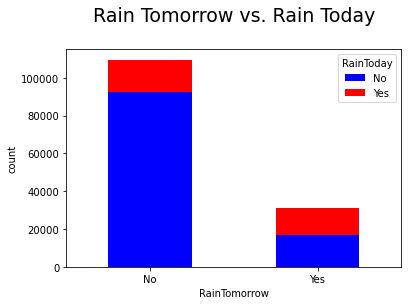

In [30]:
pd.crosstab(df_tmp['RainTomorrow'], df_tmp['RainToday']).plot.bar(stacked=True, color=['blue', 'red'])
plt.title('Rain Tomorrow vs. Rain Today\n', size=19)
plt.ylabel('count')
plt.xticks(rotation=0);


**Ce diagramme en barre montre que la variable cible 'RainTomorrow' est fortement corrélée à la variable 'RainToday'.**

In [31]:
# Valeurs manquantes :

print("il y a :" , df['RainTomorrow'].isna().sum()," valeurs manquantes 'RainTomorrow'")
print("il y a :" , df['RainToday'].isna().sum()," valeurs manquantes 'RainToday'")

il y a : 3267  valeurs manquantes 'RainTomorrow'
il y a : 3261  valeurs manquantes 'RainToday'


**Il y a des valeurs manquantes pour la cible 'RainTomorrow' mais aussi pour la variable explicative 'RainToday' à supprimer car ces variables sont très importantes et les valeurs manquantes ne représentent qu'une faible porportion des données totales.**

In [32]:
# Suppression des valeurs manquantes

df=df.dropna(subset = ['RainTomorrow', 'RainToday'])

print("il y a :" , df['RainTomorrow'].isna().sum()," valeurs manquantes 'RainTomorrow'")
print("il y a :" , df['RainToday'].isna().sum()," valeurs manquantes 'RainToday'")

il y a : 0  valeurs manquantes 'RainTomorrow'
il y a : 0  valeurs manquantes 'RainToday'


In [33]:
df['RainTomorrow'].value_counts()

No     109586
Yes     31201
Name: RainTomorrow, dtype: int64

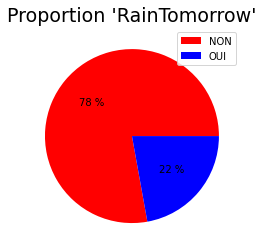

In [34]:
plt.pie(df['RainTomorrow'].value_counts(), colors = ['red', 'blue'], autopct='%0.f %%')
plt.title("Proportion 'RainTomorrow'", size=19)
plt.legend(['NON', 'OUI'] )
plt.ylabel('');


**Le jeu de données est déséquilibré car la proportion de classe positive de la cible (il pleut demain) n'est que de 22 %.
Il faudra probablement rééquilibrer le jeu de données par des méthodes de resampling.**

## **Les variables catégorielles :**





### **Cardinalités**

In [35]:
cat = [var for var in df.columns if df[var].dtype == 'object']
print("Les variables catégorielles sont :\n\n",cat)


Les variables catégorielles sont :

 ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [36]:
for var in cat :
  print("le nombre de cardinalités de la variable catégorielle", var, "est :",df[var].nunique(),"\n")


le nombre de cardinalités de la variable catégorielle Date est : 3436 

le nombre de cardinalités de la variable catégorielle Location est : 49 

le nombre de cardinalités de la variable catégorielle WindGustDir est : 16 

le nombre de cardinalités de la variable catégorielle WindDir9am est : 16 

le nombre de cardinalités de la variable catégorielle WindDir3pm est : 16 

le nombre de cardinalités de la variable catégorielle RainToday est : 2 

le nombre de cardinalités de la variable catégorielle RainTomorrow est : 2 



### **Cas de la variable 'Date'**

In [37]:
# Changement du type de la variable 'Date' : passage au format datetime :

df['Date'] = pd.to_datetime(df['Date'])
df['Date'].dtype

dtype('<M8[ns]')

In [38]:
# Création d'une colonne mois, d'une colonne année, et d'une colonne jour :

df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year
df['Day']=df['Date'].dt.day


In [39]:
# Suppression de la colonne 'Date' :

df=df.drop('Date', axis=1)



In [40]:
# Actualisation de la liste des variables catégorielles :

cat = [var for var in df.columns if df[var].dtype == 'object']
print("Les variables catégorielles sont :\n\n",cat)


Les variables catégorielles sont :

 ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


### **Cas de la variable 'Location'**

In [41]:
print('il y a des relevés dans',df['Location'].unique().shape[0], 'villes :  \n' )
print(df['Location'].unique())


il y a des relevés dans 49 villes :  

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


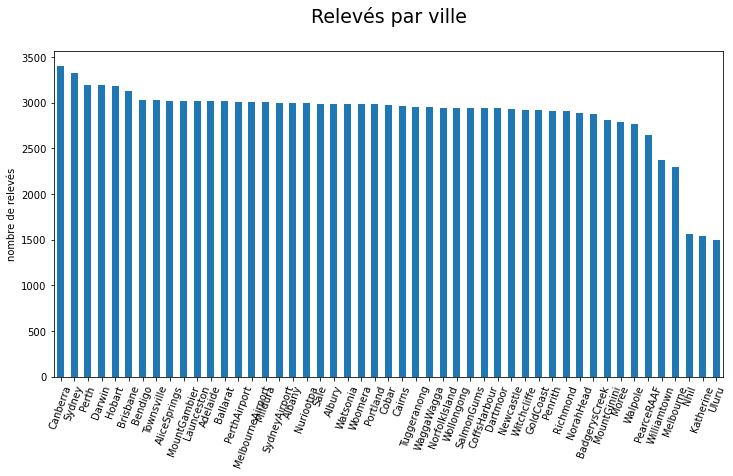

In [42]:
plt.figure(figsize=(12,6))
df['Location'].value_counts().plot.bar(rot=70)
plt.xlabel('')
plt.ylabel('nombre de relevés')
plt.title('Relevés par ville\n', size=19);


**Les villes de Katherine, Nihil et Uluru ont deux fois moins de relevés que les autres.**

### **Cas de la variable 'WindGustDir'**

In [43]:
print("\n La variable catégorielle 'WindGustDir' possède :",
      df['WindGustDir'].nunique(), "cardinalités ainsi que des valeurs manquantes :\n\n ", df['WindGustDir'].unique(), '\n' )



 La variable catégorielle 'WindGustDir' possède : 16 cardinalités ainsi que des valeurs manquantes :

  ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 nan 'E' 'SSW'] 



In [44]:
plt.figure(figsize=(12,6))
df['WindGustDir'].value_counts().plot.bar(ylabel='effectifs',rot=0)
plt.title('Diagramme en barre : WindGustDir : Direction des rafales de vent\n', size=19);


### **Cas de la variable 'WindDir9am'**

In [45]:
print("\n La variable catégorielle 'WindDir9am' possède :",
      df['WindDir9am'].nunique(), "cardinalités ainsi que des valeurs manquantes :\n\n ", df['WindDir9am'].unique(), '\n' )



 La variable catégorielle 'WindDir9am' possède : 16 cardinalités ainsi que des valeurs manquantes :

  ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'SSW' 'N' 'WSW' 'ESE' 'E' nan
 'NW' 'WNW' 'NNE'] 



### **Cas de la variable 'WindDir3pm'**

In [46]:
print("\n La variable catégorielle 'WindDir3pm' possède :",
      df['WindDir3pm'].nunique(), "cardinalités ainsi que des valeurs manquantes :\n\n ", df['WindDir3pm'].unique(), '\n' )



 La variable catégorielle 'WindDir3pm' possède : 16 cardinalités ainsi que des valeurs manquantes :

  ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE'] 



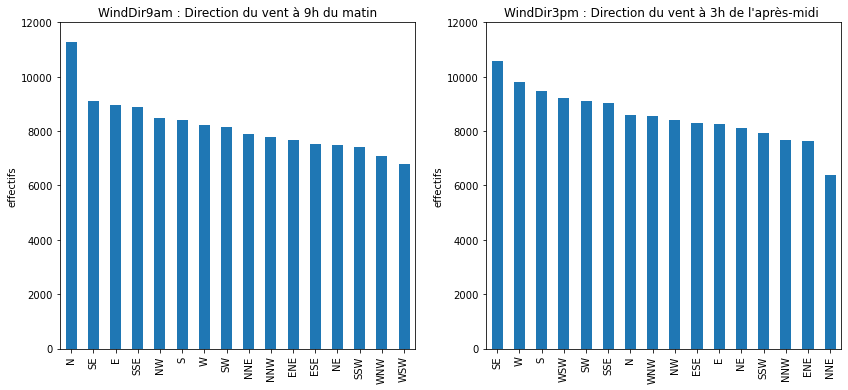

In [47]:
plt.figure(figsize=(14,6))
plt.subplot(121)
df['WindDir9am'].value_counts().plot.bar(ylabel='effectifs',title='WindDir9am : Direction du vent à 9h du matin')
plt.ylim([0,12000])
plt.subplot(122)
df['WindDir3pm'].value_counts().plot.bar(ylabel='effectifs',title="WindDir3pm : Direction du vent à 3h de l'après-midi ")
plt.ylim([0,12000]);



**Le matin le vent dominant est Nord. L'après-midi le vent dominant est Sud-Est.**

## **Les variables numériques :**


### **Outliers**

In [48]:
num = [var for var in df.columns if df[var].dtype != 'object']
print("\n Les variables numériques sont : \n\n", num, '\n\n Il y en a :',len(num),' \n')



 Les variables numériques sont : 

 ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Month', 'Year', 'Day'] 

 Il y en a : 19  



In [49]:
# Identification des outliers :

np.round(df[num].describe(),2)

MinTemp    MaxTemp   Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  140319.00  140480.00  140787.00     81093.00  73982.00      131682.00   
mean       12.18      23.24       2.35         5.47      7.63          39.97   
std         6.40       7.11       8.47         4.19      3.78          13.58   
min        -8.50      -4.80       0.00         0.00      0.00           6.00   
25%         7.60      17.90       0.00         2.60      4.90          31.00   
50%        12.00      22.60       0.00         4.80      8.50          39.00   
75%        16.80      28.30       0.80         7.40     10.70          48.00   
max        33.90      48.10     371.00       145.00     14.50         135.00   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count     139732.00     138256.00    139270.00    137286.00    127044.00   
mean          13.99         18.63        68.83        51.45      1017.65   
std            8.89          8.80        19.06        20.81         7.10   
min            0.00          0.00         0.00         0.00       980.50   
25%            7.00         13.00        57.00        37.00      1013.00   
50%           13.00         19.00        70.00        52.00      1017.60   
75%           19.00         24.00        83.00        66.00      1022.40   
max          130.00         87.00       100.00       100.00      1041.00   

       Pressure3pm  Cloud9am  Cloud3pm    Temp9am    Temp3pm      Month  \
count    127018.00  88162.00  84693.00  140131.00  138163.00  140787.00   
mean       1015.26      4.43      4.50      16.99      21.69       6.40   
std           7.04      2.89      2.72       6.50       6.94       3.43   
min         977.10      0.00      0.00      -7.20      -5.40       1.00   
25%        1010.40      1.00      2.00      12.30      16.60       3.00   
50%        1015.20      5.00      5.00      16.70      21.10       6.00   
75%        1020.00      7.00      7.00      21.60      26.40       9.00   
max        1039.60      9.00      9.00      40.20      46.70      12.00   

            Year        Day  
count  140787.00  140787.00  
mean     2012.76      15.71  
std         2.54       8.80  
min      2007.00       1.00  
25%      2011.00       8.00  
50%      2013.00      16.00  
75%      2015.00      23.00  
max      2017.00      31.00

**En observant pour chaque variable Q1, Q3, min et max on remarque que les variables 'Rainfall', 'Evaporation', 'WidnGustSpeed', 'WindSpeed9am'  et 'WindSpeed3pm' semblent présenter des outliers.  Nous allons représenter les boites à moustaches de ces variables pour vérifier.**

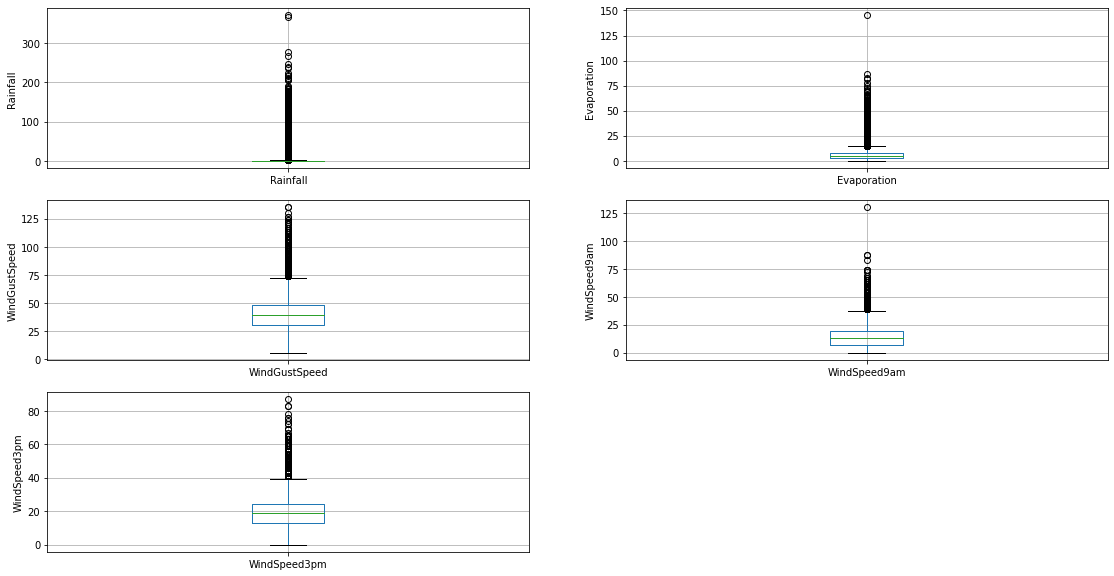

In [50]:
plt.figure(figsize=(19,10))

plt.subplot(3,2,1)

fig=df.boxplot(column = 'Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')

plt.subplot(3,2,2)
fig=df.boxplot(column ='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(3,2,3)
fig=df.boxplot(column ='WindGustSpeed')
fig.set_title('')
fig.set_ylabel('WindGustSpeed')

plt.subplot(3,2,4)
fig=df.boxplot(column ='WindSpeed9am' )
fig.set_title('')
fig.set_ylabel('WindSpeed9am' )

plt.subplot(3,2,5)
fig=df.boxplot(column ='WindSpeed3pm' )
fig.set_title('')
fig.set_ylabel('WindSpeed3pm' );


**On fait le choix de considèrer comme outliers les valeurs inférieures à Q1 - 3*IQR et supérieures à Q3 + 3*IQR**


In [51]:
# outliers 'RainFall' :

IQR = df['Rainfall'].quantile(0.75) -  df['Rainfall'].quantile(0.25)
inf = np.round(df['Rainfall'].quantile(0.25) - 3 * IQR, 2)
sup = np.round(df['Rainfall'].quantile(0.75) + 3 * IQR, 2)

print("\n Les outliers de 'rainfall' sont les valeurs inférieures à ", inf, " et supérieures à ",sup,'\n')



 Les outliers de 'rainfall' sont les valeurs inférieures à  -2.4  et supérieures à  3.2 



In [52]:
# outliers 'Evaporation' :

IQR = df['Evaporation'].quantile(0.75)-  df['Evaporation'].quantile(0.25)
inf = np.round(df['Evaporation'].quantile(0.25) - 3 * IQR,2)
sup = np.round(df['Evaporation'].quantile(0.75) + 3 * IQR,2)

print("\n Les outliers de 'Evaporation' sont les valeurs inférieures à ", inf, " et supérieures à ",sup,'\n')



 Les outliers de 'Evaporation' sont les valeurs inférieures à  -11.8  et supérieures à  21.8 



In [53]:
# outliers 'WindGustSpeed' :

IQR = df['WindGustSpeed'].quantile(0.75)-  df['WindGustSpeed'].quantile(0.25)
inf = np.round(df['WindGustSpeed'].quantile(0.25) - 3 * IQR,2)
sup = np.round(df['WindGustSpeed'].quantile(0.75) + 3 * IQR,2)

print("\n Les outliers de 'WindGustSpeed' sont les valeurs inférieures à ", inf, " et supérieures à ",sup,'\n')



 Les outliers de 'WindGustSpeed' sont les valeurs inférieures à  -20.0  et supérieures à  99.0 



In [54]:
# outliers 'WindSpeed9am' :

IQR = df['WindSpeed9am'].quantile(0.75)-  df['WindSpeed9am'].quantile(0.25)
inf = np.round(df['WindSpeed9am'].quantile(0.25) - 3 * IQR,2)
sup = np.round(df['WindSpeed9am'].quantile(0.75) + 3 * IQR,2)

print("\n Les outliers de 'WindSpeed9am' sont les valeurs inférieures à ", inf, " et supérieures à ",sup,'\n')



 Les outliers de 'WindSpeed9am' sont les valeurs inférieures à  -29.0  et supérieures à  55.0 



In [55]:
# outliers 'WindGustSpeed' :

IQR = df['WindSpeed3pm'].quantile(0.75)-  df['WindSpeed3pm'].quantile(0.25)
inf = np.round(df['WindSpeed3pm'].quantile(0.25) - 3 * IQR,2)
sup = np.round(df['WindSpeed3pm'].quantile(0.75) + 3 * IQR,2)

print("\n Les outliers de 'WindSpeed3pm' sont les valeurs inférieures à ", inf, " et supérieures à ",sup,'\n')



 Les outliers de 'WindSpeed3pm' sont les valeurs inférieures à  -20.0  et supérieures à  57.0 



### **Cas des variables 'MinTemp' et 'MaxTemp'**


In [56]:
df1 = df[['MinTemp','MaxTemp','Year']]
df1['MoyMinMaxTemp']=df[['MinTemp','MaxTemp']].mean(axis=1)

                  
df1.groupby('Year').agg({'MinTemp':'mean','MaxTemp':'mean' , 'MoyMinMaxTemp': 'mean'}). \
plot(ylabel='Température en °C',title='Evolution des moyennes des  températures Min et Max au cours des années\n')
plt.ylim(0,30)
plt.xlim(2009,2016);
plt.legend( loc ="lower center");


C:\Users\33661\AppData\Local\Temp/ipykernel_9488/3503954690.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Les moyennes annuelles des températures min et max sont stables sur 8 ans (les années 2007 et 2017 très incomplètes ont été exclues pour le graphique).**

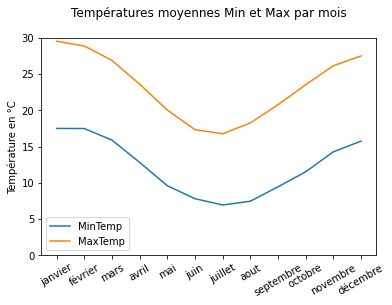

In [57]:
df.groupby('Month').agg({'MinTemp':'mean','MaxTemp':'mean' }).plot(xlabel='', 
                                                                   ylabel='Température en °C',
                                                                   title='Températures moyennes Min et Max par mois\n')
plt.xticks(range(1,13),['janvier','février','mars','avril','mai','juin','juillet','aout','septembre',
                       'octobre', 'novembre','décembre'],rotation=30)
plt.xticks()
plt.ylim(0,30);


**Il y a une saisonnalité des températures (hiver en juillet et été en décembre).**

### **Cas de la variable 'Rainfall'**

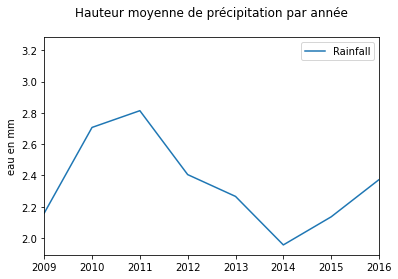

In [58]:
df.groupby('Year').agg({'Rainfall': 'mean'}). \
plot(ylabel='eau en mm', xlabel = '',title = 'Hauteur moyenne de précipitation par année\n')
plt.xlim(2009,2016);


**La moyenne annuelle des hauteurs de précipitation varie entre 2 et 2.8 mm. \
2014 a été l'année avec le moins de pluie, 2011 a été l'année avec le plus de pluie.**

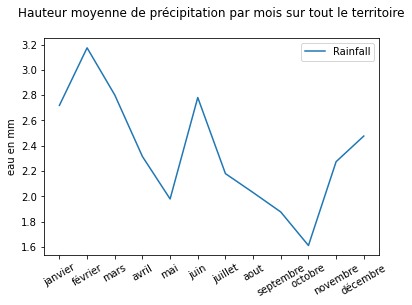

In [59]:
df.groupby('Month').agg({'Rainfall': 'mean'}). \
plot(ylabel='eau en mm', xlabel = '',title = 'Hauteur moyenne de précipitation par mois sur tout le territoire\n')
plt.xticks(range(1,13),['janvier','février','mars','avril','mai','juin','juillet','aout','septembre',
                       'octobre', 'novembre','décembre'],rotation=30)
plt.xticks();


**Globalement en Australie, février est le mois le plus  pluvieux et octobre est le mois le moins pluvieux. Mais attention le graphique précédent montre qu'il y a de fortes disparités suivants les villes**

In [60]:
len(df['Location'].unique())


49

In [61]:
# Notre cible étant la pluie, il est intéressant d'observer les hauteurs de précipitations mensuelles moyennes par ville

plt.figure(figsize=(12,50))
plt.suptitle('Moyenne mensuelle des hauteurs de précipitations par ville', y=0, size=19)
i=1
for var in df['Location'].unique()  :
  df_var = pd.DataFrame(df[df['Location']==var].groupby('Month').agg({'Rainfall': 'mean'}))
  plt.subplot(17,3,i)
  plt.plot( df_var.index, df_var.values)
  plt.xticks(range(1,13),['janvier','février','mars','avril','mai','juin','juillet','aout','septembre',
                       'octobre', 'novembre','décembre'],rotation=30)
  plt.ylabel('mm')
  plt.xticks()
  plt.title('{}'.format(var))
  i+=1
plt.tight_layout()


**On retrouve les données de la carte animée des températures**

### **Cas de la variable 'Evaporation'**

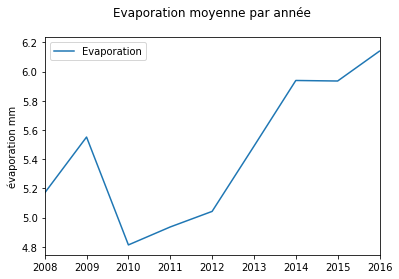

In [62]:
df.groupby('Year').agg({'Evaporation': 'mean'}). \
plot(ylabel='évaporation mm', xlabel = '',title = 'Evaporation moyenne par année\n')
plt.xlim(2008,2016);


**L'évaporation est en augmentation depuis 2010.**

In [63]:
df.groupby('Month').agg({'Evaporation': 'mean'}). \
plot(ylabel='évaporation en mm', xlabel = '',title = 'Evaporation moyenne par mois\n')
plt.xticks(range(1,13),['janvier','février','mars','avril','mai','juin','juillet','aout','septembre',
                       'octobre', 'novembre','décembre'],rotation=30)
plt.xticks();


**L'évaporation est beaucoup plus importante en été (décembre) qu'en hiver (juin).**

### **Cas de la variable 'Sunshine'**

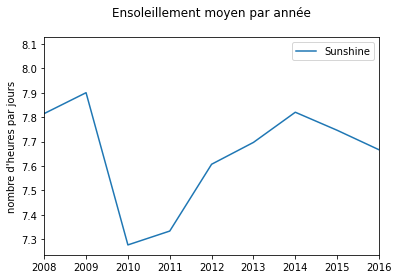

In [64]:
df.groupby('Year').agg({'Sunshine': 'mean'}). \
plot(ylabel="nombre d'heures par jours", xlabel = '',title = 'Ensoleillement moyen par année\n')
plt.xlim(2008,2016);


**Il y entre 7,3 et 7,9 heures de soleil par jour (moyennes annuelles)**

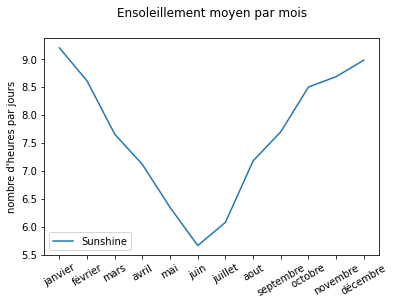

In [65]:
df.groupby('Month').agg({'Sunshine': 'mean'}). \
plot(ylabel="nombre d'heures par jours", xlabel = '',title = 'Ensoleillement moyen par mois\n')
plt.xticks(range(1,13),['janvier','février','mars','avril','mai','juin','juillet','aout','septembre',
                       'octobre', 'novembre','décembre'],rotation=30)
plt.xticks();


**L'ensoleillement est beaucoup plus important en été (décembre) qu'en hiver (juin).** 

### **Cas de la variable 'WindGustSpeed'**

In [66]:
df.groupby('Year').agg({'WindGustSpeed' :'mean'}).plot(ylabel='Vitesse en km/h',
                                                        title='Vitesse moyenne des rafales de vent par année\n')
plt.xlim(2008,2016);


**La vitesse annuelle moyenne des rafales de vent est comprises entre 39 et 42 km/h.**

In [67]:
df.groupby('Month').agg({'WindGustSpeed': 'mean'}). \
plot(ylabel="vitesse en km/h", xlabel = '',title = 'Vitesse moyenne des rafales de vent par mois\n')
plt.xticks(range(1,13),['janvier','février','mars','avril','mai','juin','juillet','aout','septembre',
                       'octobre', 'novembre','décembre'],rotation=30)
plt.xticks();


**Les rafales les plus rapides sont en été (décembre) et les moins rapides en hiver (juin).**

### **Cas des variables 'WindSpeed9am' et 'WindSpeed3pm'**

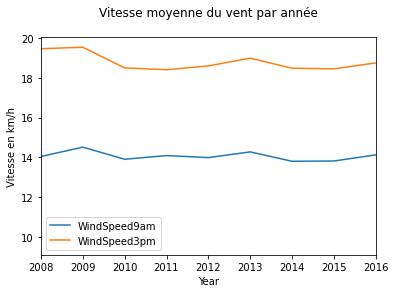

In [68]:
df.groupby('Year').agg({'WindSpeed9am':'mean','WindSpeed3pm':'mean'}).plot(ylabel='Vitesse en km/h',
                                                        title='Vitesse moyenne du vent par année\n')
plt.xlim(2008,2016);


**La vitesse moyenne par année du vent reste stable : 14 km/h à 9 h du matin et plus élevée l'après-midi : 19 km/h.**

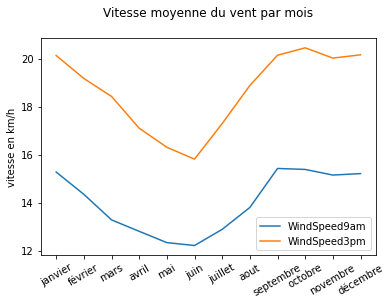

In [69]:
df.groupby('Month').agg({'WindSpeed9am':'mean','WindSpeed3pm':'mean'}). \
plot(ylabel="vitesse en km/h", xlabel = '',title = 'Vitesse moyenne du vent par mois\n')
plt.xticks(range(1,13),['janvier','février','mars','avril','mai','juin','juillet','aout','septembre',
                       'octobre', 'novembre','décembre'],rotation=30)
plt.xticks();


**La saison la plus venteuse est l'été (décembre) et la moins venteuse l'hiver(juin).**

### **Cas des variables 'Humidity9am' et 'Humidity3pm'**


In [70]:
df.groupby('Year').agg({'Humidity9am':'mean','Humidity3pm':'mean'}).plot(ylabel='Humidité en %',
                                                                         title='Humidité relative moyenne par année\n')
plt.xlim(2008,2016);


**L'humidité relative est plus élevée à 9h du matin qu'à 3h de l'après-midi (+15%)**

In [71]:
df.groupby('Month').agg({'Humidity9am':'mean','Humidity3pm':'mean'}).plot(xlabel='',ylabel='Humidité en %',
                                                                         title='Humidité relative moyenne par mois\n');
plt.xticks(range(1,13),['janvier','février','mars','avril','mai','juin','juillet','aout','septembre',
                       'octobre', 'novembre','décembre'],rotation=30)
plt.xticks();


**L'hiver (juin) est plus humides que l'été(décembre).**

### Cas des variables 'Pressure9am' et 'Pressure3pm'

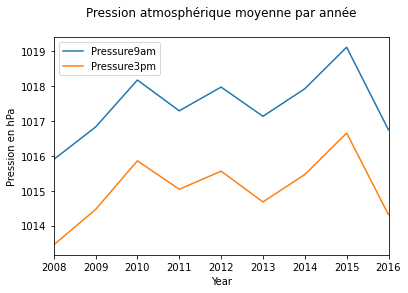

In [72]:
df.groupby('Year').agg({'Pressure9am':'mean','Pressure3pm':'mean'}).plot(ylabel='Pression en hPa',
                                  title='Pression atmosphérique moyenne par année\n')
plt.xlim(2008,2016);



**La pression atmosphérique moyenne est plus élevée à 9h du matin qu'à 3 h de l'après-midi.**

In [73]:
df.groupby('Month').agg({'Pressure9am':'mean','Pressure3pm':'mean'}).plot(xlabel='',ylabel='Pression en hPa',
                                                                         title='Pression atmosphérique moyenne par mois\n')
    

plt.xticks(range(1,13),['janvier','février','mars','avril','mai','juin','juillet','aout','septembre',
                       'octobre', 'novembre','décembre'],rotation=30)
plt.xticks();


 **La pression atmosphérique moyenne mensuelle est plus élevée en hiver (juin) qu'en été (décembre).**

### **Cas des variables 'Cloud9am' et 'Cloud3pm'**


In [74]:
df.groupby('Year').agg({'Cloud9am':'mean','Cloud3pm':'mean'}).plot(ylabel='Fraction de nuage en huitième ',
                                                                         title='Moyenne par année de la fraction nuageuse\n')
plt.xlim(2008,2016);


**De 2009 à 2013, la fraction de nuage était plus importante l'après-midi à 3h que le matin à 9h. Depuis 2014 on ne note pas de différence entre le matin et l'après-midi. En revanche on note une augmentation de la fraction nuageuse entre 2013 et 2016 (environ un huitième).**

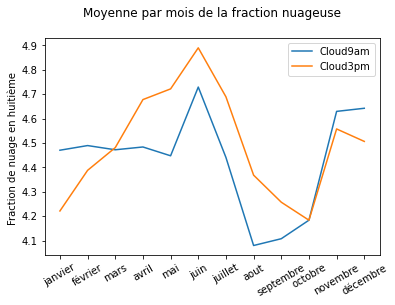

In [75]:
df.groupby('Month').agg({'Cloud9am':'mean','Cloud3pm':'mean'}).plot(xlabel='',ylabel='Fraction de nuage en huitième ',
                                                                         title='Moyenne par mois de la fraction nuageuse\n');
plt.xticks(range(1,13),['janvier','février','mars','avril','mai','juin','juillet','aout','septembre',
                       'octobre', 'novembre','décembre'],rotation=30)
plt.xticks();


**Juin est le mois le plus nuageux. Les mois d'août à octobre sont les moins nuageux.**

### **Cas des variables 'Temp9am' et 'Temp3pm'**

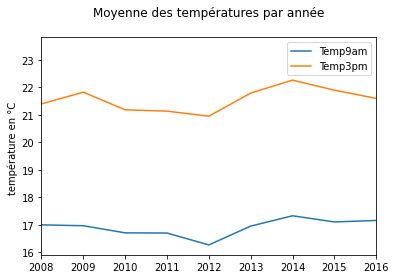

In [76]:
df.groupby('Year').agg({'Temp9am':'mean','Temp3pm':'mean'}).plot(xlabel = '',ylabel='température en °C ',
                                                                         title='Moyenne des températures par année\n');
plt.xlim(2008,2016);


**La température moyenne annuelle le matin à 9h et l'après-midi à 15 h est relativement stable entre 2008 et 2016 (5°C de plus l'après-midi).**

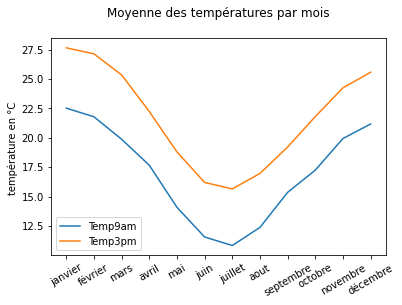

In [77]:
df.groupby('Month').agg({'Temp9am':'mean','Temp3pm':'mean'}).plot(xlabel='',ylabel='température en °C ',
                                                                         title='Moyenne des températures par mois\n')
plt.xticks(range(1,13),['janvier','février','mars','avril','mai','juin','juillet','aout','septembre',
                       'octobre', 'novembre','décembre'],rotation=30)
plt.xticks();


**Il y a une saisonnalité des températures (hiver en juillet).**

In [80]:
df.to_excel('dataset.xlsx')